## Домашнее задание к занятию №2 от 03.10.2019 г. «Работа с пропусками»
ФИО: Кривова Татьяна Сергеевна

**Задание**. Проведите эксплоративный анализ данных на данных недвижимости Бостона и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown. Переменная, которую надо предсказать - MEDV.

**1. Загружаю датасет, смотрю основную информацию по атрибутам.**

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

type(boston)
boston.keys()

sklearn.utils.Bunch

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
raw_data = pd.read_csv(boston.filename, skiprows=1) # raw_data.shape --> (506, 14)

In [6]:
raw_data.info()
raw_data.head(10)
# 13 признаков и целевая переменная, во всех столбцах числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [7]:
raw_data.isna().sum() # Количество отсутствующих значений в каждом столбце

# Вывод: отсутствующих значений (Nan элементов) нет.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Посмотрим основные статистики для атрибутов:
raw_data.describe() 

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

**2. Посмотрим информацию о содержимом датасета.**

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Атрибуты:

* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitrogen oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted mean of distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 dollars
* **PTRATIO**: pupil-teacher ratio by town
* **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: lower status of the population (percent)
* **MEDV (target variable)**: median value of owner-occupied homes in 1000 dollars

In [14]:
# Подробный отчет по датасету. Смотрю информацию о целевой метрике MEDV:
pandas_profiling.ProfileReport(raw_data)

**3. Посмотрим распределения переменных, корреляции, feature_importances и выбросы. Выберем атрибуты для использования в модели.**

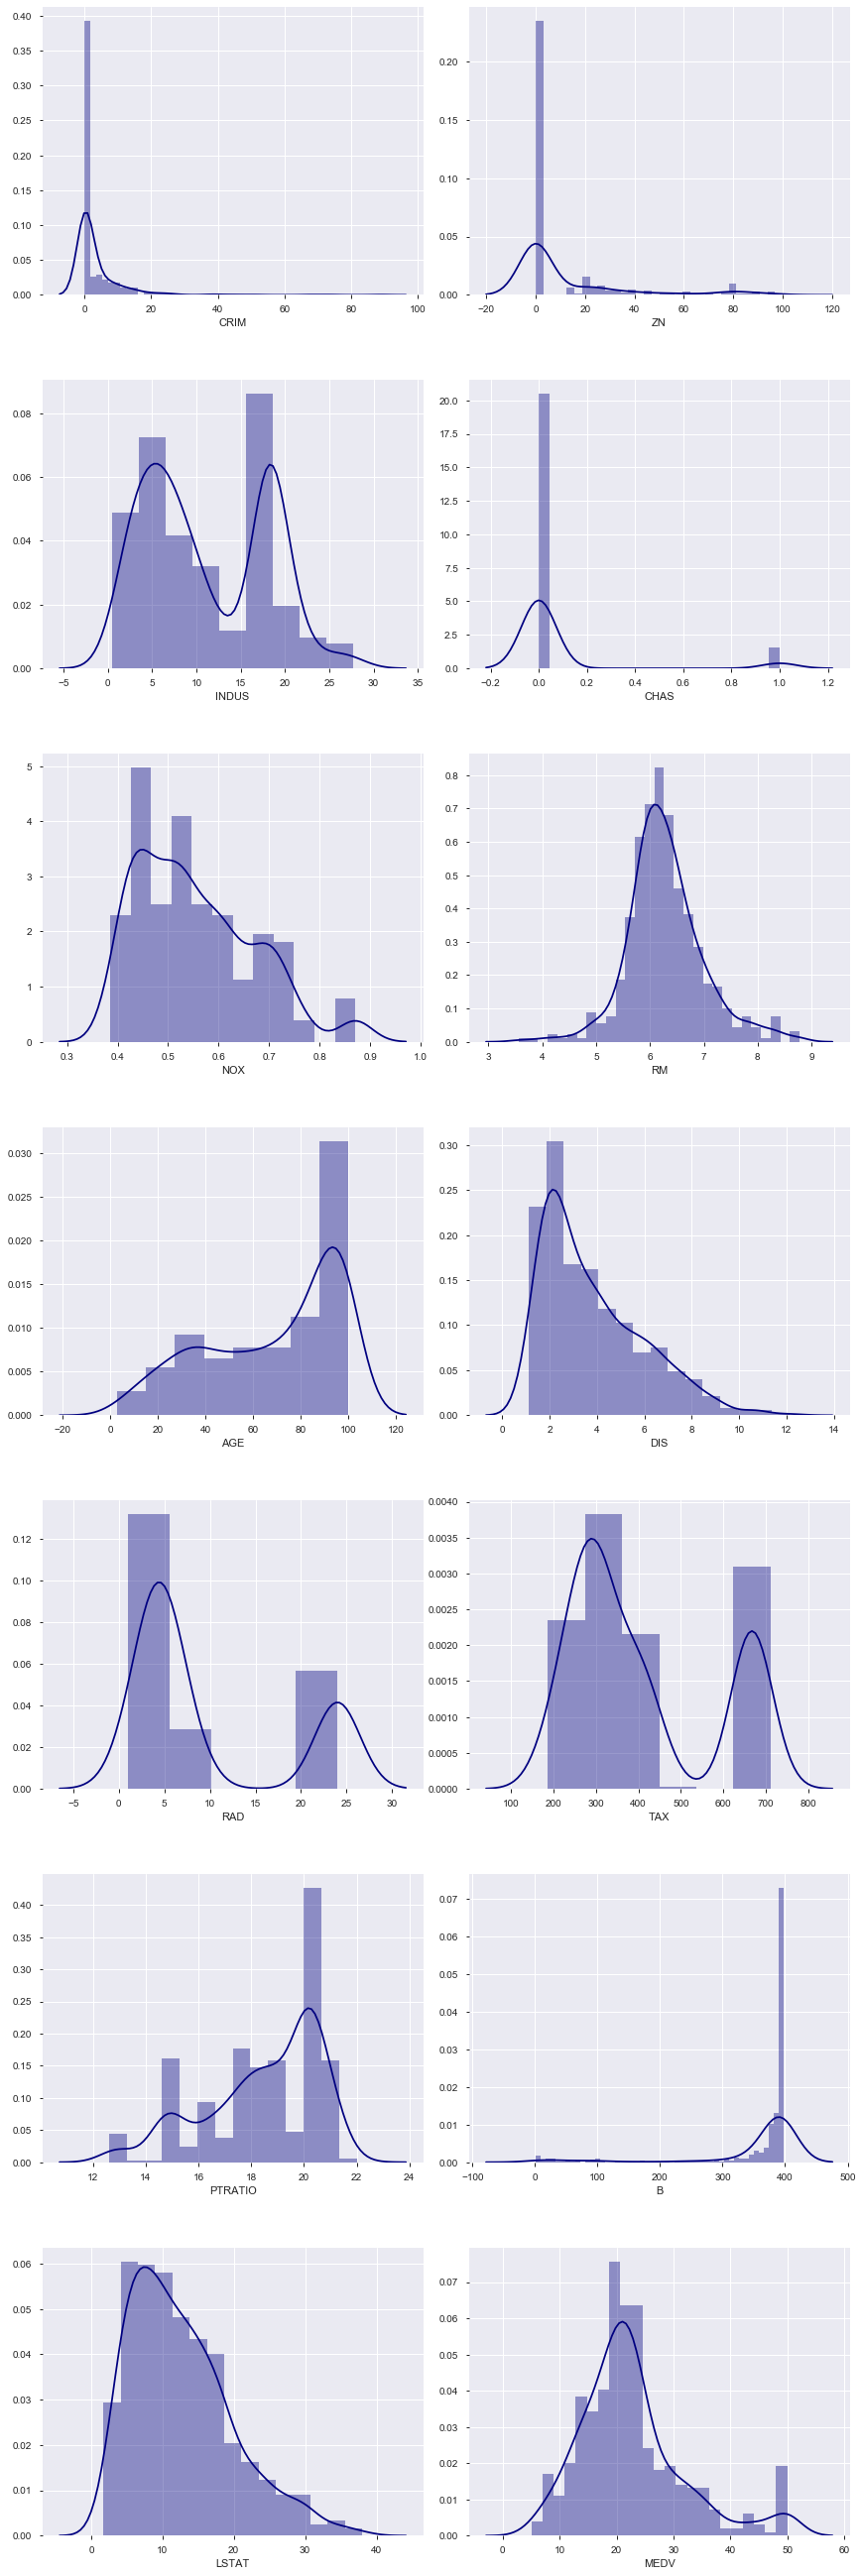

In [15]:
# Частотные графики для всех значений (sns.distplot)

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(12, 36))
index = 0
axs = axs.flatten()

for k,v in raw_data.items():
    sns.distplot(v, ax=axs[index], color='navy')
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Выводы: целевая переменная **MEDV** имеет распределение, визуально близкое к нормальному, возможно, с выбросами - проанализируем их отдельно. 

Атрибут **CHAS** имеет дискретное распределение, Бернулли. Атрибуты **CRIM, ZN, B** имеют сильно перекошенные распределения. Будем это учитывать при отборе признаков для модели (вероятно, их не стОит выбирать).

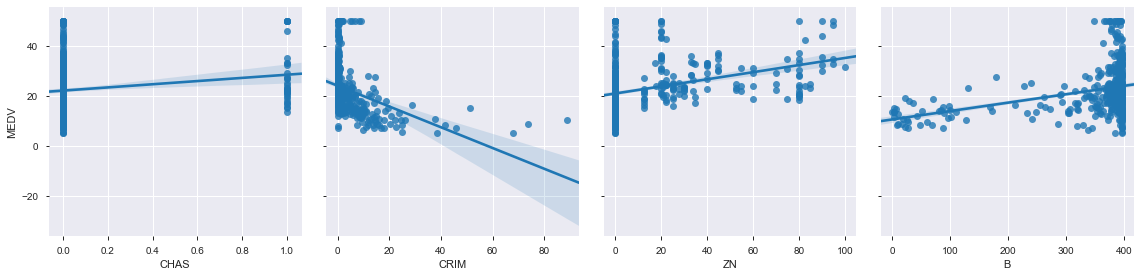

In [16]:
# Посмотрим зависимость целевой переменной medv от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["CHAS", "CRIM", "ZN", "B"],\
             y_vars=["MEDV"], kind="reg", height=4)

In [17]:
# Матрица корреляций

correlations = raw_data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

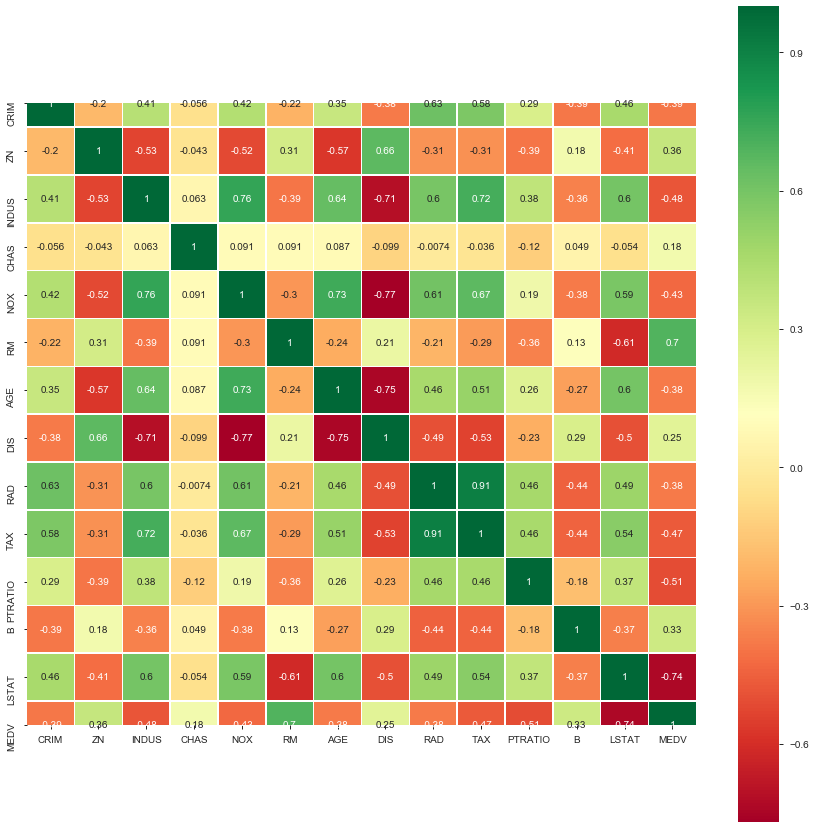

In [18]:
# Матрица корреляции в виде тепловой карты (sns.heatmap)

rcParams['figure.figsize'] = 15,15
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

In [19]:
# Посмотрим, у скольких элементов корреляция с целевой метрикой MEDV >= 60% 
place = 0
for number in correlations.MEDV:
    place+=1
    if abs(number) >= 0.6: print(f'Элемент {place}: коэффициент корреляции {round(number,5)}')

Элемент 6: коэффициент корреляции 0.69536
Элемент 13: коэффициент корреляции -0.73766
Элемент 14: коэффициент корреляции 1.0


Из таблицы корреляций обратим внимание на переменные, которые коррелируют (положительно или отрицательно) с искомым значением (MEDV), корреляция > 60% у двух атрибутов.

LSTAT имеет отрицательную высокую корреляцию (-0.738) с MEDV, вторая величина по корелляции - RM (0.695).

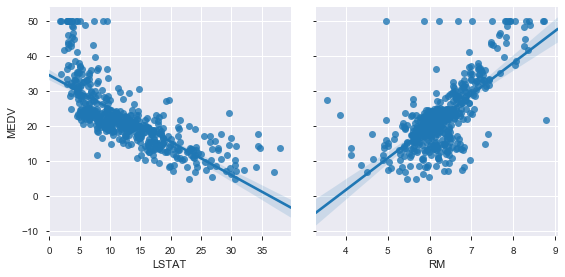

In [20]:
# Посмотрим зависимость целевой переменной MEDV от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["LSTAT", "RM"],\
             y_vars=["MEDV"], kind="reg", height=4)

In [21]:
# Найдем элементы, у которых корреляция с целевой метрикой MEDV >= 45% и < 60%
place = 0
for number in correlations.MEDV:
    place+=1
    if abs(number) >= 0.45 and abs(number) < 0.6: print(f'Элемент {place}: коэффициент корреляции {round(number,5)}')

Элемент 3: коэффициент корреляции -0.48373
Элемент 10: коэффициент корреляции -0.46854
Элемент 11: коэффициент корреляции -0.50779


Следующими по величине абсолютной корелляции идут значения **PTRATIO, INDUS, TAX**.

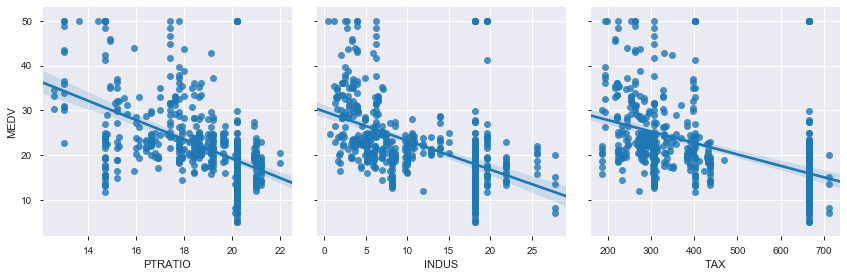

In [22]:
# Посмотрим зависимость целевой переменной medv от этих атрибутов и проверим выводы (sns.pairplot)
sns.pairplot(raw_data,\
             x_vars=["PTRATIO", "INDUS", "TAX"],\
             y_vars=["MEDV"], kind="reg", height=4)

Вывод: исходя из анализа матрицы корреляций, имеем следующие 5 атрибутов-кандидатов для построения линейной модели:
**LSTAT, RM, PTRATIO, INDUS, TAX**.

In [23]:
# Посмотрим feature_importances

output_y = raw_data.MEDV
input_x = raw_data.loc[:, :'LSTAT']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3, random_state=4)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=6, splitter='best')

Text(0.5, 0, 'Важность атрибутов')

Text(0, 0.5, 'Атрибуты')

Text(0.5, 1.0, 'Наиболее важные атрибуты')

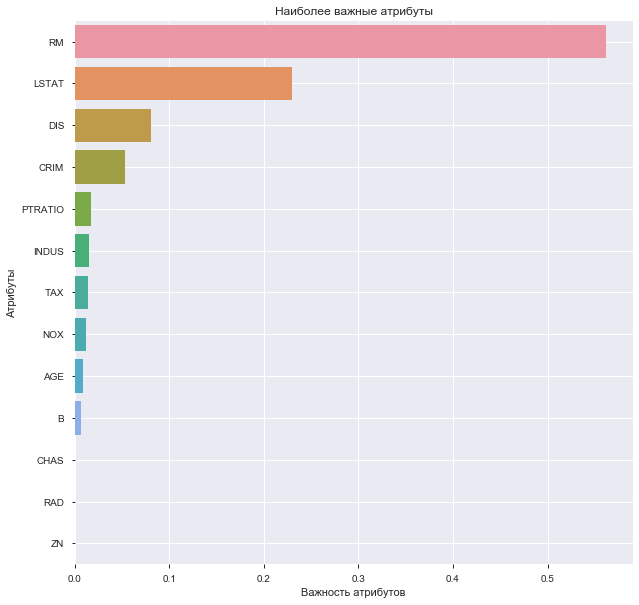

In [25]:
# создаем модель деревья регрессии
rg=DecisionTreeRegressor(max_depth=7, random_state=6, presort=True)

# обучаем модель
rg.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(rg.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.grid(True)
plt.show()

In [26]:
rg.score(X_train,y_train) # coefficient of determination R^2 of the prediction

0.9631913752716441

Проанализируем топ-5 наиболее важных атрибутов:

**RM, LSTAT, PTRATIO** - уже отобрали по матрице корреляций.
    
**DIS, CRIM** - третий и четвертый по важности атрибуты. Возможно, имеет смысл их рассмотреть в качестве кандидатов для модели.

Вывод: исходя из анализа матрицы корреляций и feature_importances, выберем следующие комбинации атрибутов для построения моделей и сравним качество моделей: 

**1) LSTAT, RM, PTRATIO, INDUS, TAX**

**2) LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM**

In [27]:
model_data = raw_data[["LSTAT", "RM", "PTRATIO", "INDUS", "TAX", "DIS", "CRIM", "MEDV"]]

model_data.shape
model_data.head()

(506, 8)

LSTAT     RM  PTRATIO  INDUS  TAX     DIS     CRIM  MEDV
0   4.98  6.575     15.3   2.31  296  4.0900  0.00632  24.0
1   9.14  6.421     17.8   7.07  242  4.9671  0.02731  21.6
2   4.03  7.185     17.8   7.07  242  4.9671  0.02729  34.7
3   2.94  6.998     18.7   2.18  222  6.0622  0.03237  33.4
4   5.33  7.147     18.7   2.18  222  6.0622  0.06905  36.2

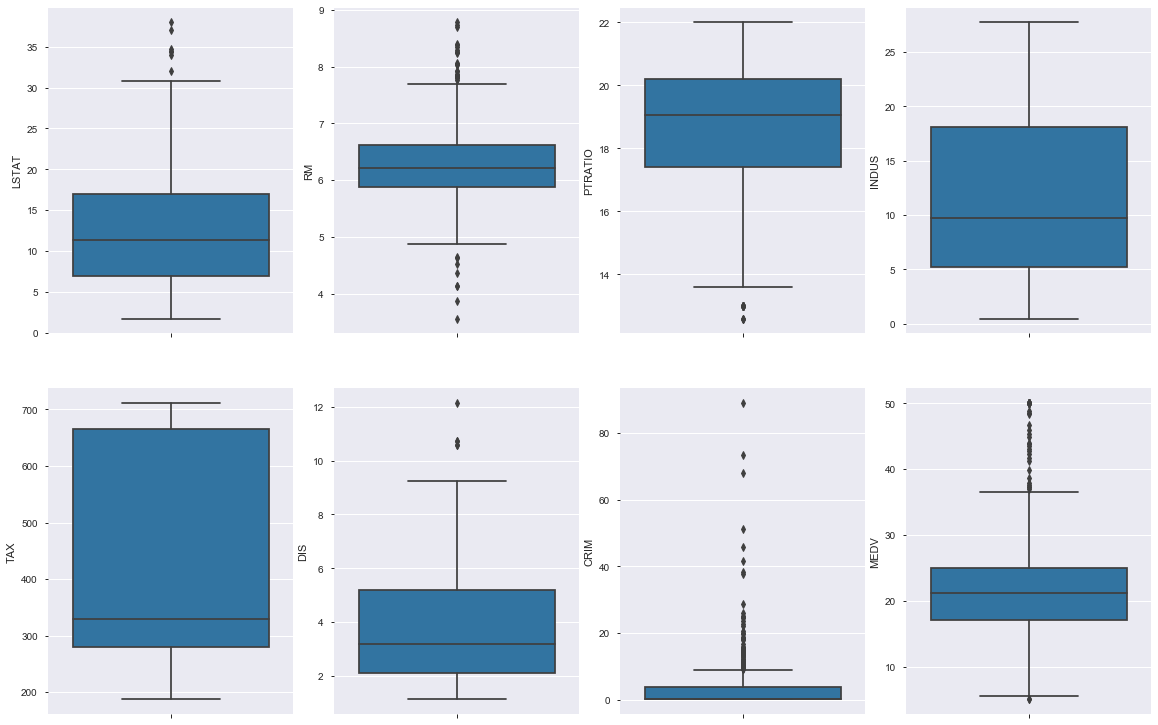

In [28]:
# Посмотрим выбросы для каждой переменной. 
# По графикам boxplot видно, что выбросы есть. И что у атрибутов разный масштаб значений

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 10))
index = 0
axs = axs.flatten()
for k,v in model_data.items():
    sns.boxplot(y=k, data=model_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [29]:
# Поработаем с выбросами:

model_data_outliers = model_data.describe().loc[['25%','75%'],:]

model_data_outliers.loc['IQ'] = 0 # interquartile range: IQ
model_data_outliers.loc['Q1 - 1.5*IQ'] = 0 # lower inner fence: Q1 - 1.5*IQ
model_data_outliers.loc['Q3 + 1.5*IQ'] = 0 # upper inner fence: Q3 + 1.5*IQ
model_data_outliers.loc['Q1 - 3*IQ'] = 0 # lower outer fence: Q1 - 3*IQ
model_data_outliers.loc['Q3 + 3*IQ'] = 0 # upper outer fence: Q3 + 3*IQ

In [30]:
for col,val in model_data_outliers.items():
    model_data_outliers[col]['IQ'] = val[1]-val[0]
    model_data_outliers[col]['Q1 - 1.5*IQ'] = val[0] - 1.5*(val[1]-val[0])
    model_data_outliers[col]['Q3 + 1.5*IQ'] = val[1] + 1.5*(val[1]-val[0])
    model_data_outliers[col]['Q1 - 3*IQ'] = val[0] - 3*(val[1]-val[0])
    model_data_outliers[col]['Q3 + 3*IQ'] = val[1] + 3*(val[1]-val[0])

In [31]:
model_data_outliers

LSTAT      RM  PTRATIO   INDUS     TAX        DIS       CRIM  \
25%           6.9500  5.8855     17.4   5.190   279.0   2.100175   0.082045   
75%          16.9550  6.6235     20.2  18.100   666.0   5.188425   3.677082   
IQ           10.0050  0.7380      2.8  12.910   387.0   3.088250   3.595037   
Q1 - 1.5*IQ  -8.0575  4.7785     13.2 -14.175  -301.5  -2.532200  -5.310511   
Q3 + 1.5*IQ  31.9625  7.7305     24.4  37.465  1246.5   9.820800   9.069639   
Q1 - 3*IQ   -23.0650  3.6715      9.0 -33.540  -882.0  -7.164575 -10.703067   
Q3 + 3*IQ    46.9700  8.8375     28.6  56.830  1827.0  14.453175  14.462195   

                MEDV  
25%          17.0250  
75%          25.0000  
IQ            7.9750  
Q1 - 1.5*IQ   5.0625  
Q3 + 1.5*IQ  36.9625  
Q1 - 3*IQ    -6.9000  
Q3 + 3*IQ    48.9250

In [32]:
spisok_extr = []

for col,val in model_data_outliers.items():
    lower = model_data_outliers[col]['Q1 - 3*IQ']
    upper = model_data_outliers[col]['Q3 + 3*IQ']
# Добавляю в список индексы строк с экстремальными выбросами:
    spisok_extr += (list(model_data[model_data[col] < lower].index) + list(model_data[model_data[col] > upper].index))

In [33]:
len(spisok_extr), len(set(spisok_extr)) # общее количество индексов в списке и количество уникальных

# Вывод: имеем 47 строк с экстремальными выбросами

(47, 47)

In [34]:
spisok_ord = []

for col,val in model_data_outliers.items():
    lower = model_data_outliers[col]['Q1 - 1.5*IQ']
    upper = model_data_outliers[col]['Q3 + 1.5*IQ']
# Добавляю в список индексы строк со всеми выбросами:
    spisok_ord += (list(model_data[model_data[col] < lower].index) + list(model_data[model_data[col] > upper].index))

In [35]:
len(spisok_ord), len(set(spisok_ord)) # общее количество индексов в списке и количество уникальных

# Вывод: имеем 121 строку со всеми выбросами

(163, 121)

In [36]:
# Удаляю из датафрейма model_data 121 строку со всеми выбросами

rows_to_drop = list(set(spisok_ord))
model_data.drop(index=rows_to_drop, inplace=True) # model_data.shape --> (385, 8)

Выбросы исключили.

**4. Масштабирование.**

In [38]:
model_data.describe()

LSTAT          RM     PTRATIO       INDUS         TAX         DIS  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean    11.971922    6.210774   18.480779   10.556519  374.722078    4.104305   
std      5.783302    0.471879    1.941647    6.658609  146.522034    1.951809   
min      1.980000    4.903000   14.700000    0.740000  188.000000    1.321600   
25%      7.390000    5.898000   17.400000    5.190000  277.000000    2.463100   
50%     11.100000    6.163000   18.700000    8.140000  307.000000    3.724000   
75%     15.550000    6.487000   20.200000   18.100000  403.000000    5.415900   
max     30.810000    7.691000   21.200000   27.740000  711.000000    9.222900   

             CRIM        MEDV  
count  385.000000  385.000000  
mean     1.227317   21.726753  
std      2.175803    5.550937  
min      0.006320    7.000000  
25%      0.069110   18.400000  
50%      0.171710   21.400000  
75%      0.988430   24.400000  
max      8.982960   36.400000

In [39]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # Масштабирование
np_scaled = min_max_scaler.fit_transform(model_data)
df_scaled = pd.DataFrame(np_scaled)

# Столбцы с маленькой буквы после масштабирования
df_scaled.columns = ['lstat', 'rm', 'ptratio', 'indus', 'tax', 'dis', 'crim', 'medv']

In [40]:
df_scaled.head()
df_scaled.describe()

lstat        rm   ptratio     indus       tax       dis      crim  \
0  0.104058  0.599713  0.092308  0.058148  0.206501  0.350373  0.000000   
1  0.248352  0.544476  0.476923  0.234444  0.103250  0.461380  0.002338   
2  0.071106  0.818508  0.476923  0.234444  0.103250  0.461380  0.002336   
3  0.033299  0.751435  0.615385  0.053333  0.065010  0.599977  0.002902   
4  0.116198  0.804878  0.615385  0.053333  0.065010  0.599977  0.006988   

       medv  
0  0.578231  
1  0.496599  
2  0.942177  
3  0.897959  
4  0.993197

lstat          rm     ptratio       indus         tax         dis  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean     0.346581    0.469072    0.581658    0.363575    0.357021    0.352183   
std      0.200600    0.169254    0.298715    0.246615    0.280157    0.247024   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.187652    0.356887    0.415385    0.164815    0.170172    0.144470   
50%      0.316337    0.451937    0.615385    0.274074    0.227533    0.304051   
75%      0.470690    0.568149    0.846154    0.642963    0.411090    0.518181   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             crim        medv  
count  385.000000  385.000000  
mean     0.136019    0.500910  
std      0.242385    0.188807  
min      0.000000    0.000000  
25%      0.006995    0.387755  
50%      0.018424    0.489796  
75%      0.109407    0.591837  
max      1.000000    1.000000

In [41]:
cor_matrix = df_scaled.corr()
cor_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

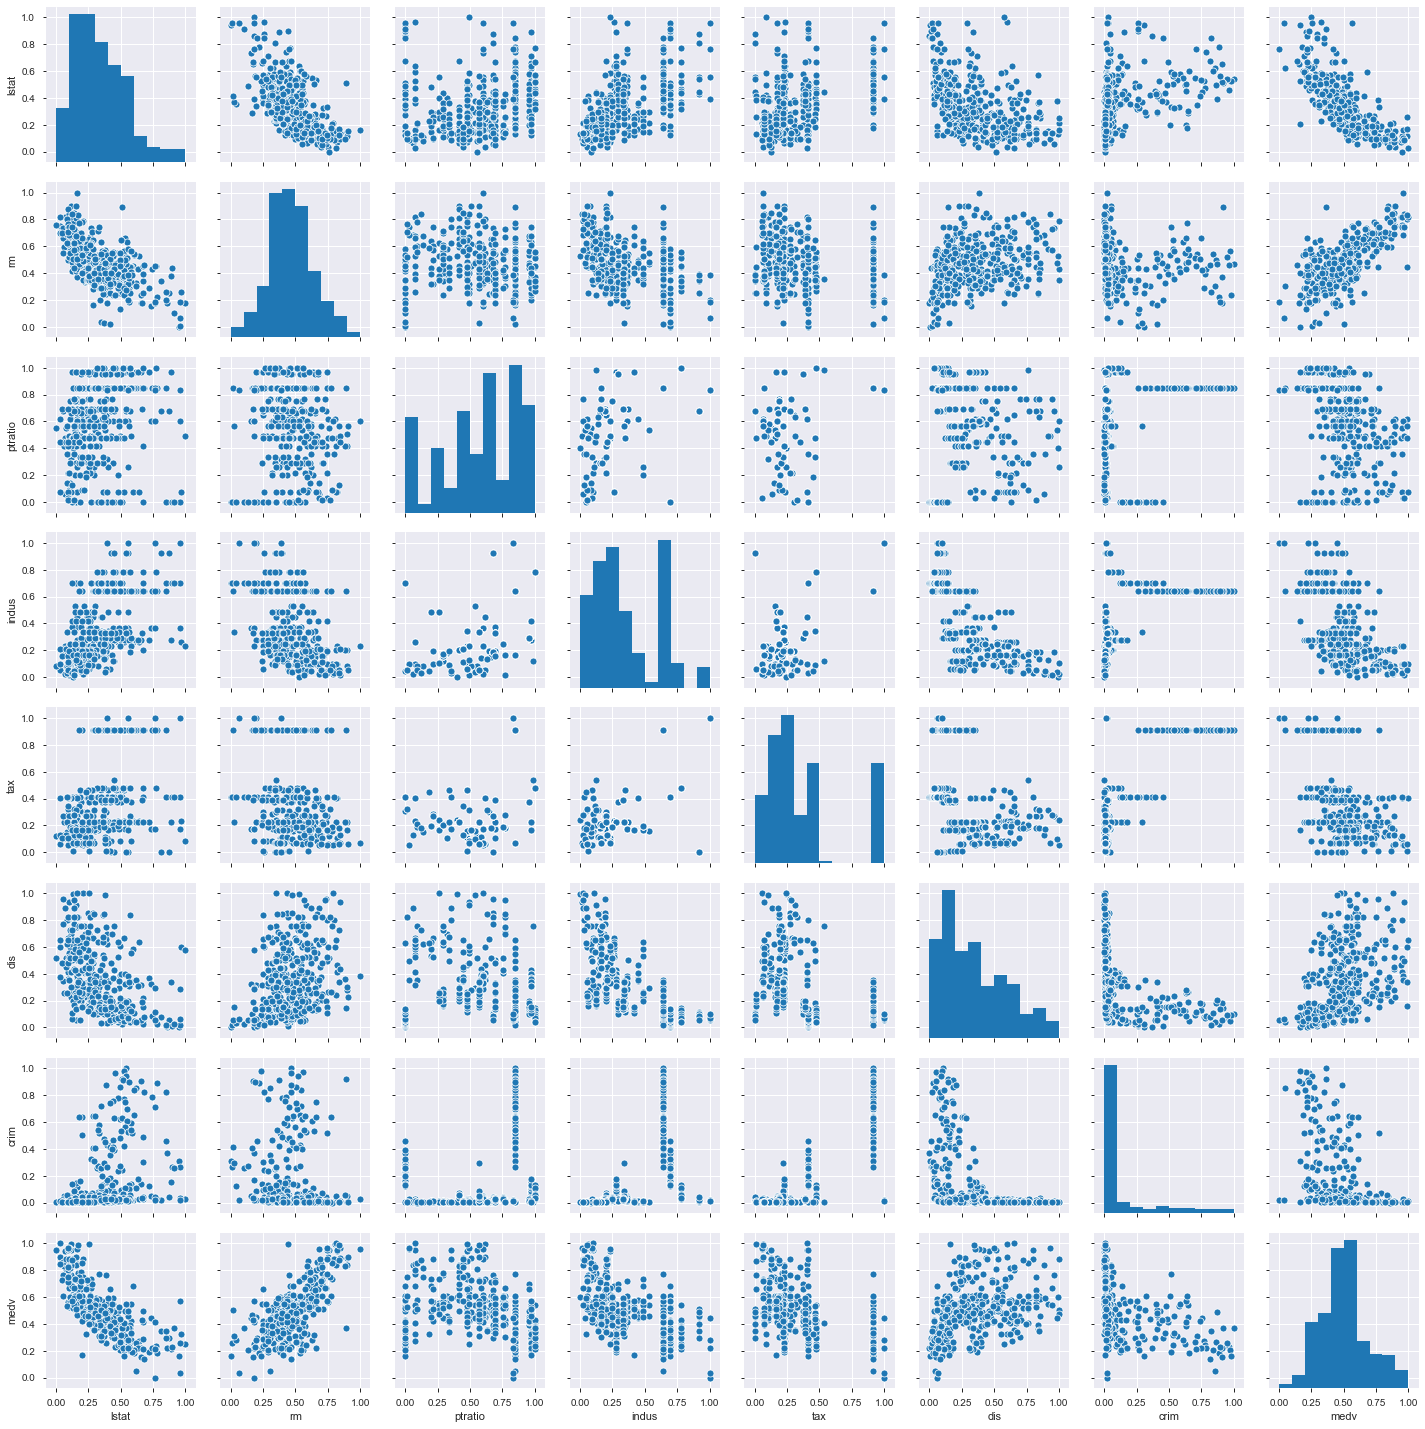

In [42]:
# Посмотрим на атрибуты попарно:
sns.pairplot(df_scaled)

**5. Разделение датасета на тестовую и обучающую выборки.**

In [43]:
output_y = df_scaled.medv
input_x = df_scaled.loc[:, :'crim']

In [44]:
X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(input_x, output_y, train_size=0.7, random_state=27)

In [45]:
X_train_27.shape, len(y_train_27)

X_test_27.shape, len(y_test_27)

((269, 7), 269)

((116, 7), 116)

**6. LinearRegression**

In [46]:
# Датафрейм для результатов
results = pd.DataFrame(columns=['model', 'features', 'train_score', 'r2_score', 'mae', 'mse'])

results.loc[0] = ['LinearRegression', 'LSTAT, RM, PTRATIO, INDUS, TAX', 0,0,0,0]
results.loc[1] = ['LinearRegression', 'LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM', 0,0,0,0]

In [47]:
# Первая модель - линейная регрессия с пятью признаками (LSTAT, RM, PTRATIO, INDUS, TAX).

first_model_1 = LinearRegression().fit(X_train_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']], y_train_27)

print('intercept:', first_model_1.intercept_)
print('slope:', first_model_1.coef_)

intercept: 0.5170316714729027
slope: [-0.31096584  0.46082742 -0.11701852 -0.03075504 -0.11823938]


In [48]:
results.train_score[0] = first_model_1.score(X_train_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']], y_train_27) 
# coefficient of determination R^2 of the prediction

In [50]:
# оцениваем модель LinearRegression
first_1_pred = first_model_1.predict(X_test_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']])

results.r2_score[0] = r2_score(y_test_27, first_1_pred)
results.mae[0] = mean_absolute_error(y_test_27, first_1_pred)
results.mse[0] = mean_squared_error(y_test_27, first_1_pred)

In [52]:
# Линейная регрессия с семью признаками (LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM).

first_model_2 = LinearRegression().fit(X_train_27, y_train_27)

print('intercept:', first_model_2.intercept_)
print('slope:', first_model_2.coef_)

intercept: 0.5826201542519287
slope: [-0.33128851  0.44784978 -0.12017265 -0.09119413 -0.0711655  -0.10326747
 -0.06685427]


In [53]:
results.train_score[1] = first_model_2.score(X_train_27, y_train_27) 

In [55]:
first_2_pred = first_model_2.predict(X_test_27)

results.r2_score[1] = r2_score(y_test_27, first_2_pred)
results.mae[1] = mean_absolute_error(y_test_27, first_2_pred)
results.mse[1] = mean_squared_error(y_test_27, first_2_pred)

In [57]:
results # Смотрим результаты модели линейной регрессии

model                                   features train_score  \
0  LinearRegression             LSTAT, RM, PTRATIO, INDUS, TAX    0.698601   
1  LinearRegression  LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM    0.708708   

   r2_score        mae         mse  
0  0.727782  0.0756603  0.00871338  
1  0.736986  0.0750101  0.00841875

**7. DecisionTreeRegressor**

In [58]:
# Дополним датафрейм для результатов

results.loc[2] = ['DecisionTreeRegressor', 'LSTAT, RM, PTRATIO, INDUS, TAX', 0,0,0,0]
results.loc[3] = ['DecisionTreeRegressor', 'LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM', 0,0,0,0]

In [60]:
# Вторая модель - DecisionTreeRegressor с пятью признаками (LSTAT, RM, PTRATIO, INDUS, TAX).

second_model_1 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']], y_train_27)

In [61]:
results.train_score[2] = second_model_1.score(X_train_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']], y_train_27)

In [63]:
# оцениваем модель DecisionTreeRegressor
second_1_pred = second_model_1.predict(X_test_27[['lstat', 'rm', 'ptratio', 'indus', 'tax']])

results.r2_score[2] = r2_score(y_test_27, second_1_pred)
results.mae[2] = mean_absolute_error(y_test_27, second_1_pred)
results.mse[2] = mean_squared_error(y_test_27, second_1_pred)

In [65]:
# DecisionTreeRegressor с семью признаками (LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM).

second_model_2 = DecisionTreeRegressor(max_depth=7, random_state=9, presort=True).fit(X_train_27, y_train_27)

In [66]:
results.train_score[3] = second_model_2.score(X_train_27, y_train_27)

In [68]:
second_2_pred = second_model_2.predict(X_test_27)

results.r2_score[3] = r2_score(y_test_27, second_2_pred)
results.mae[3] = mean_absolute_error(y_test_27, second_2_pred)
results.mse[3] = mean_squared_error(y_test_27, second_2_pred)

In [70]:
results # Смотрим результаты модели линейной регрессии и DecisionTreeRegressor

model                                   features  \
0       LinearRegression             LSTAT, RM, PTRATIO, INDUS, TAX   
1       LinearRegression  LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM   
2  DecisionTreeRegressor             LSTAT, RM, PTRATIO, INDUS, TAX   
3  DecisionTreeRegressor  LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM   

  train_score  r2_score        mae         mse  
0    0.698601  0.727782  0.0756603  0.00871338  
1    0.708708  0.736986  0.0750101  0.00841875  
2    0.939919  0.618601  0.0844406   0.0122081  
3    0.946024  0.568548  0.0893086   0.0138103

**8. Оценим качество регрессии при помощи метрик.**

In [71]:
# Наилучшая модель исходя из рассчитанных метрик:
results.loc[1,:]

# Вывод: учитывая что среднее значение нормированной целевой метрики 0.501 (получилась ошибка около 15%)

model                                   LinearRegression
features       LSTAT, RM, PTRATIO, INDUS, TAX, DIS, CRIM
train_score                                     0.708708
r2_score                                        0.736986
mae                                            0.0750101
mse                                           0.00841875
Name: 1, dtype: object